# Project 2c-Validation Curves





<div class="mark">
Create the validation curves for LogisticRegression classifier on C and KNeighborsClassifier on  k (neighbors).</div><i class="fa fa-lightbulb-o "></i>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
plt.rc('font', family='serif')
%matplotlib inline

In [4]:
X, y = load_breast_cancer(return_X_y=True)

In [5]:
data = load_breast_cancer()

In [6]:
data["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
X.shape

(569, 30)

Exercise 1: return the proportion of data of each class present in the dataset, you can do it in a dictionary, which includes the class (key) and the corresponding proportion (value). This will be useful to track the separation in training, validation and test data

In [8]:
def label_proportion(y):
    result = {}
    n = y.shape[0]
    for label in np.unique(y):
        ns = np.sum(y == label)
        result[label] = ns/n
    return result

In [9]:
result = label_proportion(y)

If you did well, you should print 0.37 and 0.63.

In [10]:
result

{0: 0.37258347978910367, 1: 0.6274165202108963}

In [11]:
for label, prop in label_proportion(y).items():
    msg = "Proportion of samples with label {}: {:.2f}"
    print(msg.format(label, prop))

Proportion of samples with label 0: 0.37
Proportion of samples with label 1: 0.63


** Exercise 2 **: implements a function that starts `X` and` y` in training, validation and testing. I recommend using the function `train_test_split` As support.

In [12]:
def train_val_test_split(X, y, sizes=(0.5, 0.25, 0.25)):
    #assert sum(sizes) == 1, "Data set sizes should sum to 1!"
    
    n_total = X.shape[0]
    
    train_size, val_size, test_size = sizes[0], sizes[1], sizes[2]
    
    X_, X_test, y_, y_test = train_test_split(X, y, test_size=test_size)
    
    n_train_val = X_.shape[0]
    train_size = train_size*n_total/n_train_val
    
    X_train, X_val, y_train, y_val = train_test_split(
                                    X_, y_, train_size=train_size
    )
        
    return X_train, X_val, X_test, y_train, y_val, y_test

In [13]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, sizes=(0.6, 0.3, 0.1))

The different records in each data set must be, with possible tiny differences, 341, 171 y 57.

In [14]:
for x_, y_ in zip((X_train, X_val, X_test), (y_train, y_val, y_test)):
    print("X shape: {}, y shape: {}".format(x_.shape, y_.shape))

X shape: (341, 30), y shape: (341,)
X shape: (171, 30), y shape: (171,)
X shape: (57, 30), y shape: (57,)



Explore the quality of the partition: as we mentioned, the ideal is that the distrubuctions are similar throughout the training, validation and test sets; So it is important to validate this.

In [15]:
for set_, y_ in (("train", y_train), ("val", y_val), ("test", y_test)):
    for label, prop in label_proportion(y_).items():
        msg = "Proportion of samples with label {}: {:.2f} ({})"
        print(msg.format(label, prop, set_))

Proportion of samples with label 0: 0.34 (train)
Proportion of samples with label 1: 0.66 (train)
Proportion of samples with label 0: 0.44 (val)
Proportion of samples with label 1: 0.56 (val)
Proportion of samples with label 0: 0.35 (test)
Proportion of samples with label 1: 0.65 (test)


In [16]:
def show_data_histograms(datasets):
    
    n_sets = len(datasets)
    num_variables = datasets[0][1].shape[1]
      
    fig = plt.figure(figsize=(3*n_sets, num_variables*3))
        
    subs = []
    for i in range(num_variables):
        for j, (k, X_) in enumerate(datasets):
            subs.append((j, k, X_, i))
        
    for p, info in enumerate(subs):
            j, k, X_, i = info

            ax = fig.add_subplot(num_variables, n_sets, p+1)          
            ax.hist(X_[:,i], bins=20)
            
            ax.set_title(k)
            ax.set_xticklabels([])
       
    plt.show()

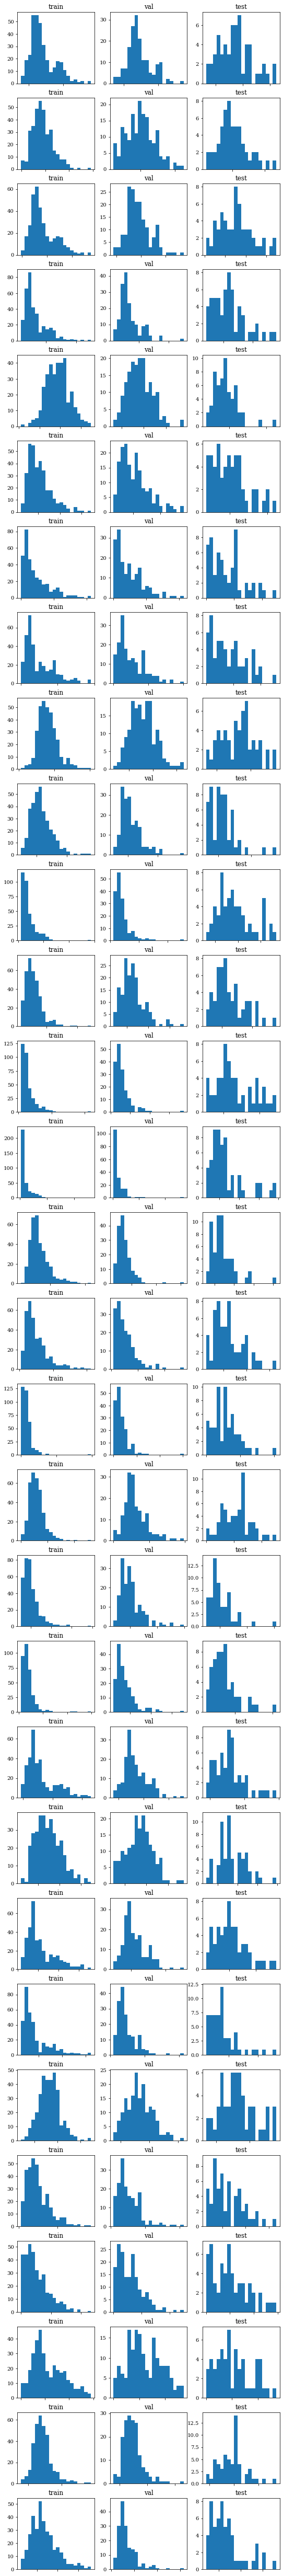

In [17]:
show_data_histograms([('train', X_train), ('val', X_val), ('test', X_test)])


Now that we have our separate data set in training, validation and testing, we can explore the validation and learning curves of the different models.

 <span class="mark">Create a validation curve for the `LogisticRegression` classifier of the scikit-learn library (check the [user guide](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). The validation curve must be constructed by varying the hyperparameter `C` in the values`[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]`. 
Fix the next cell!</span>


0.9590643274853801


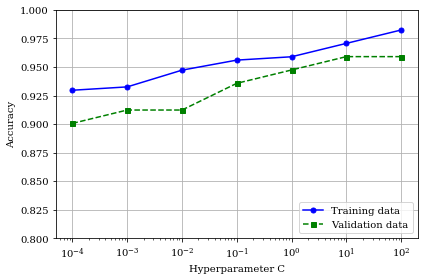

In [18]:
# create empty lists to store training and validation scores
train_scores = []
val_scores = []
param_range = (0.0001, 0.001, 0.01, 0.1, 1, 10, 100)
for c in param_range:
    
    # make an instance of the LogisticRegresión class, in which the parameter
    # C is explicit: clf = LogisticRegression(...)
    clf = LogisticRegression(C=c, max_iter=100000)
    
    # train the model
    # enter your code here.
    clf.fit(X_train, y_train) 
    
    # get predictions for training and validation data
    # enter your code here.
    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)
    
    # compute the accuracy score of the model on the training and validation data
    # enter your code
    train_score = accuracy_score(y_train, y_train_pred)
    val_score = accuracy_score(y_val, y_val_pred)
    
    # append the computed scores to the corresponding lists
    # enter your code here.
    train_scores.append(train_score)
    val_scores.append(val_score)
    
# print max(val_scores) use np
print(np.max(val_scores))

# plot the scores along the diffent values of the hyper parameter
# Enter your code here.
plt.plot(param_range, train_scores, 
         color='blue', marker='o', 
         markersize=5, label='Training data')

plt.plot(param_range, val_scores, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation data')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Hyperparameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

This same procedure can be applied for any combination of model, hyperparameter and metric.

 <span class="mark">Perform a validation curve for the `KNeighborsClassifier` class by varying the number of neighbors to consider; In addition, this time you should use the `f1_score` as a metric. As always, please check the [user guide](http://scikit-learn.org/stable/modules/neighbors.html#classification) and the [class documentation](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).</span> 

0.9387755102040817


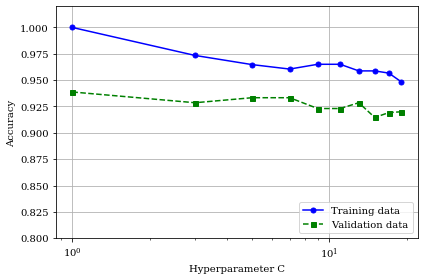

In [19]:
# create empty lists to store training and validation scores
train_scores = []
val_scores = []
param_range = range(1, 20, 2)
for k in param_range:
    
    # make an instance of the LogisticRegresión class, in which the parameter
    # C is explicit: clf = LogisticRegression(...)
    clf = KNeighborsClassifier(n_neighbors=k)
    
    # train the model
    # enter your code here.
    clf.fit(X_train, y_train)
    
    # get predictions for training and validation data
    # enter your code here.
    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)
    
    # compute the f1 score of the model on the training and validation data
    # enter your code here.
    train_score = f1_score(y_train, y_train_pred)
    val_score = f1_score(y_val, y_val_pred)
    
    # append the computed scores to the corresponding lists
    # enter your code here.
    train_scores.append(train_score)
    val_scores.append(val_score)
    
# print max(val_scores) use np.
# enter your code here.
print(np.max(val_scores))    

# plot the scores along the diffent values of the hyper parameter
# enter your code here.
plt.plot(param_range, train_scores, 
         color='blue', marker='o', 
         markersize=5, label='Training data')

plt.plot(param_range, val_scores, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation data')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Hyperparameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.02])
plt.tight_layout()
plt.show()